In [1]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [2]:
azimut_mask = [270,330]
elevation_mask = [3,30]
min_height = 2
max_height = 4
t_range = 30
main_path_2 = os.path.abspath('../data/20220907/2/')
main_path_3 = os.path.abspath('../data/20220907/3/')

main_path = main_path_2
month = 9
day = 7

In [3]:
frequency = dapr.generate_frequency(min_height=min_height,max_height=max_height)
signal_ts = {}

for dt in tqdm(range(0,t_range-1)):
    starttime = datetime(year=2022,month=month,day=day,hour=8,\
        minute=0+dt,second=0,tzinfo=timezone.utc)
    endtime = datetime(year=2022,month=month,day=day,hour=14,\
        minute=0+dt,second=0,tzinfo=timezone.utc)
    deltatime = timedelta(minutes=t_range)

    data_dict = dafi.clean_data(main_path,azimut_mask=azimut_mask,\
        elevation_mask=elevation_mask,sn1_trigger=True)

    split_data_dict = dafi.split_data(data_dict,starttime,endtime,deltatime)
    result_dict = dapr.data_prepare(split_data_dict,frequency=frequency)

    for satellite_code in result_dict:
        for t,p in zip(result_dict[satellite_code]['time'],\
            result_dict[satellite_code]['power']):
            if t in signal_ts:
                signal_ts[t] = np.multiply(p,signal_ts[t])
            else:
                signal_ts[t] = p
height_ts = {}
for t in signal_ts:
    p = signal_ts[t]
    index = p==max(p)
    h = frequency[index]
    height_ts[t] = h[0]

100%|██████████| 29/29 [01:36<00:00,  3.32s/it]


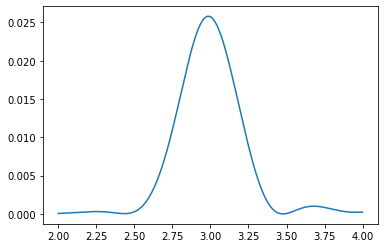

In [11]:
t1 = list(signal_ts.keys())[1]
sig = signal_ts[t1]

plt.plot(frequency,sig)

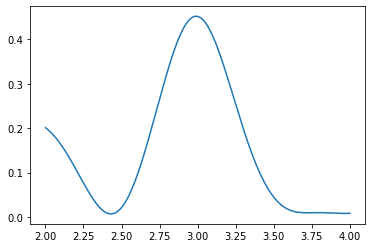

In [12]:
t1 = list(signal_ts.keys())[2]
sig = signal_ts[t1]

plt.plot(frequency,sig)

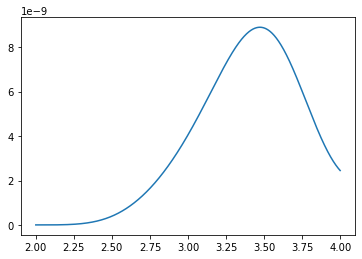

In [13]:
t1 = list(signal_ts.keys())[3]
sig = signal_ts[t1]

plt.plot(frequency,sig)

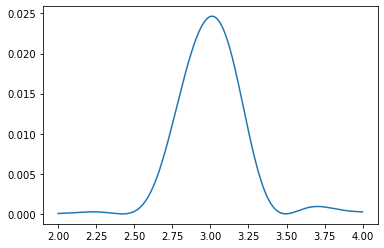

In [14]:
t1 = list(signal_ts.keys())[4]
sig = signal_ts[t1]

plt.plot(frequency,sig)